In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/Arun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

In [3]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
data = pd.read_csv(r"/Users/Arun/Downloads/amazon_alexa.csv")

In [5]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [7]:
len(data)


3150

In [8]:
#Check for null values

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [9]:
data = data.dropna(subset=['verified_reviews'])
print(data.isnull().sum())

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [10]:
len(data)

3149

In [11]:
data['length'] = data['verified_reviews'].apply(len)

In [12]:
#Distinct values of 'rating' and its count  

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


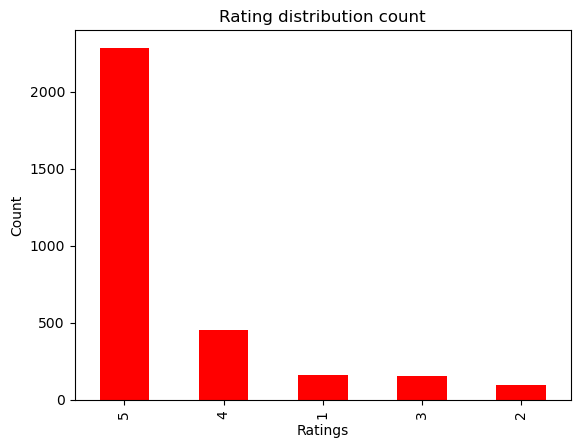

In [13]:
#Bar plot to visualize the total counts of each rating

data['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

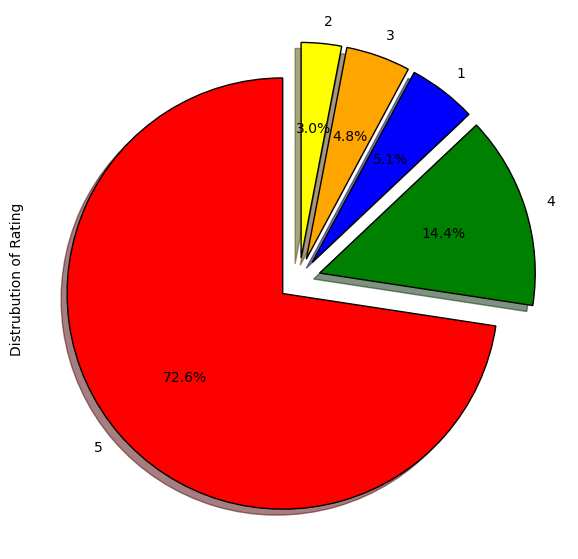

In [14]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Distrubution of Rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [15]:
def classify_sentiment(rating):
    if rating in [1, 2]:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    elif rating in [4, 5]:
        return 2  # Positive
    else:
        return None  # or handle unexpected values



In [16]:
# Apply the function
data['feedback'] = data['rating'].apply(classify_sentiment)

In [27]:
print(data[['rating', 'feedback']].head(10))


   rating  feedback
0       5         2
1       5         2
2       4         2
3       5         2
4       5         2
5       5         2
6       3         1
7       5         2
8       5         2
9       5         2


In [ ]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

In [ ]:
# Distinct values of 'feedback' and their count
print("Feedback value count:\n")
print(data['feedback'].value_counts())

In [ ]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[5]['verified_reviews']
print(review_0)

In [ ]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[11]['verified_reviews']
print(review_1)

In [ ]:
#Extracting the 'verified_reviews' value for one record with feedback = 2

review_2 = data[data['feedback'] == 2].iloc[20]['verified_reviews']
print(review_2)

In [ ]:

# From the above examples we can see that feedback 0 is negative review, 1 is neutral and 2 is positive review

#Let's plot the feedback value count in a bar graph

In [ ]:
#Bar graph to visualize the total counts of each feedback

data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

In [ ]:
#Feedback distribution

# 87.04% reviews are positive
# 8.13% reviews are neutral 
# 4.83 reviews are negative

In [ ]:
#Let's see the 'rating' values for different values of 'feedback'
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()



In [ ]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

In [ ]:
#Feedback = 2
data[data['feedback'] == 2]['rating'].value_counts()

In [ ]:
#If rating of a review is 1 or 2 then the feedback is 0 (negative), if the rating is 3 (Neutral) and if 4 or 5 then the feedback is 1 (positive).
#Analyzing 'variation' column
#This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [ ]:
#Distinct values of 'variation' and its count 

print(f"Variation value count: \n{data['variation'].value_counts()}")

In [ ]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

In [ ]:
#Mean rating according to variation
data.groupby('variation')['rating'].mean()

In [ ]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [ ]:
#Analyzing 'verified_reviews' column
#This column contains the textual review given by the user for a variation for the product.
data['length'].describe()

In [ ]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

In [ ]:
#Length analysis when feedback is 0 (negative)

sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')


In [ ]:
#Length analysis when feedback is 1 (neutral)
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')


In [ ]:
#Length analysis when feedback is 1 (positive)
sns.histplot(data[data['feedback']==2]['length'],color='green').set(title='Distribution of length of review if feedback = 2')

In [ ]:
#Lengthwise mean rating
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()


In [ ]:
# performing a bag-of-words transformation on your text data (verified_reviews column) as a feature extraction step before feeding it into a machine learning model
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

In [ ]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='black', max_words=75)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
# Combine all reviews for each feedback category and convert to lowercase word list
neg_reviews = " ".join(data[data['feedback'] == 0]['verified_reviews']).lower().split()
neu_reviews = " ".join(data[data['feedback'] == 1]['verified_reviews']).lower().split()
pos_reviews = " ".join(data[data['feedback'] == 2]['verified_reviews']).lower().split()

# Finding words that are unique to each category

# Words unique to negative reviews (not in neutral or positive)
unique_negative = [x for x in neg_reviews if x not in neu_reviews and x not in pos_reviews]
unique_negative = " ".join(unique_negative)

# Words unique to neutral reviews (not in negative or positive)
unique_neutral = [x for x in neu_reviews if x not in neg_reviews and x not in pos_reviews]
unique_neutral = " ".join(unique_neutral)

# Words unique to positive reviews (not in negative or neutral)
unique_positive = [x for x in pos_reviews if x not in neg_reviews and x not in neu_reviews]
unique_positive = " ".join(unique_positive)


In [ ]:
wc = WordCloud(background_color='black', max_words=75)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
wc = WordCloud(background_color='black', max_words=75)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_neutral))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
wc = WordCloud(background_color='black', max_words=75)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
#Preprocessing and Modelling
#To build the corpus from the 'verified_reviews' we perform the following -

#Replace any non alphabet characters with a space
#Covert to lower case and split into words
#Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [19]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [21]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [29]:
import os
os.makedirs('Models', exist_ok=True)


In [31]:
#Saving the Count Vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [33]:
#Checking the shape of X and y

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [35]:
#Splitting data into train and test set with 30% data with testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")


X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [37]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


In [39]:
#We'll scale X_train and X_test so that all values are between 0 and 1.

scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [41]:
#Saving the scaler model
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [43]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [45]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9886569872958257
Testing Accuracy : 0.9142857142857143


In [47]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)


In [49]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

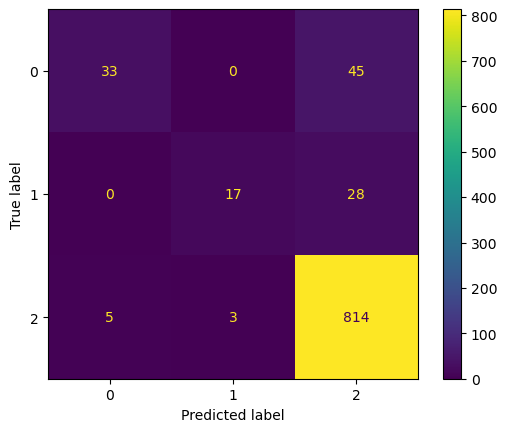

In [51]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [53]:
#K fold cross-validation

accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.902449609214315
Standard Variance : 0.008683558443523597


In [55]:
#Applying grid search to get the optimal parameters on random forest

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [57]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [59]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 12, 'n_estimators': 100}


In [61]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 95.40607985480943
Cross validation mean accuracy on test set : 88.0728221415608
Accuracy score for test set : 0.9142857142857143


In [63]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:

#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9732304900181489
Testing Accuracy : 0.9079365079365079


In [67]:
y_preds = model_xgb.predict(X_test)

In [69]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 38   3  37]
 [  3  16  26]
 [ 14   8 800]]


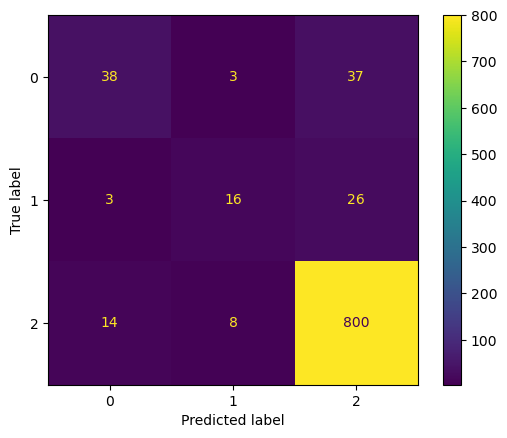

In [71]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [73]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

In [75]:
#Decision Tree Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [77]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9886569872958257
Testing Accuracy : 0.8835978835978836


In [79]:

y_preds = model_dt.predict(X_test)

In [81]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 45   3  30]
 [ 10  24  11]
 [ 76  27 719]]


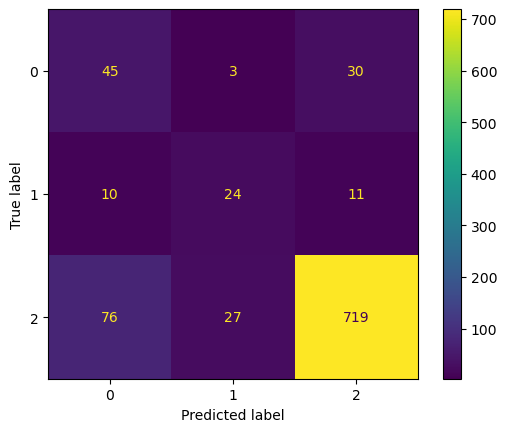

In [83]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()